# Task 2

##  Build a benchmark model for the given dataset

#### Import  libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
# simple prediction model

# take a mean of trip duration

df["trip_duration_mean"]=df["trip_duration"].mean()
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_mean
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,952.229133
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,952.229133
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,952.229133
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,952.229133
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,952.229133


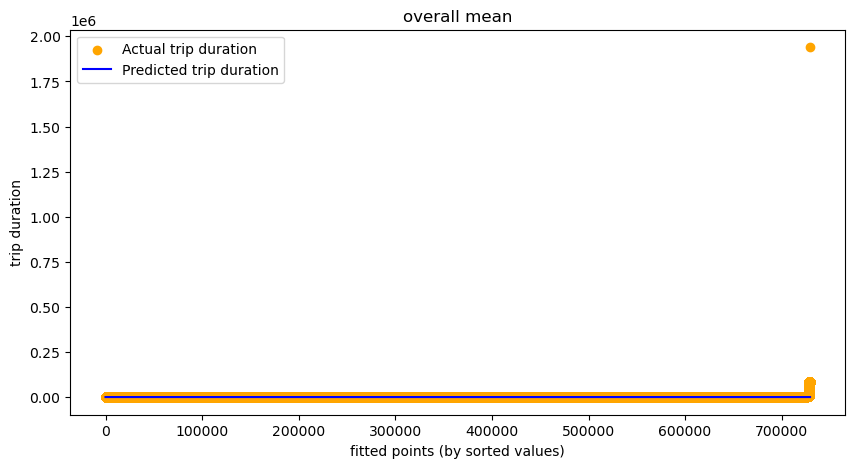

In [5]:
# Lets visualize actual trip duration and predicted trip duration by  plotting

plt.figure(figsize=(10,5))
k = range(0,len(df))
plt.scatter(k,df["trip_duration"].sort_values(),color="orange",label="Actual trip duration")
plt.plot(k,df["trip_duration_mean"].sort_values(),color ="blue",label="Predicted trip duration")
plt.xlabel("fitted points (by sorted values)")
plt.ylabel("trip duration")
plt.title("overall mean")
plt.legend()



## Observation

In conclusion, we can reasonably conclude that our actual trip duration is almost the same as our predicted trip duration.

In [6]:
# Trip duration in hours

df['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

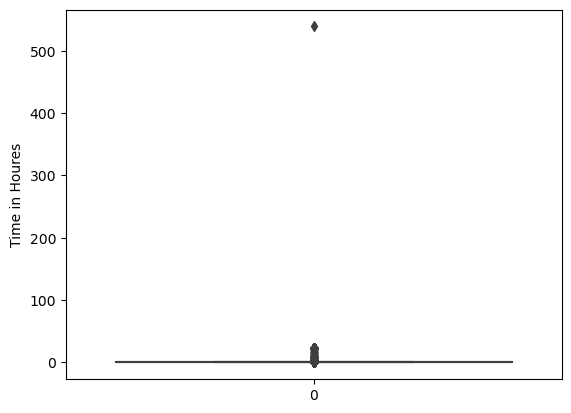

In [7]:

sns.boxplot(df['trip_duration']/3600)
plt.ylabel("Time in Houres")
plt.show()

In [12]:
df.trip_duration.min()

1

In [13]:
df.trip_duration.max()

1939736

## Observations:
    1.Some trip durations are over 500 hr which is over 20 days may be this is a outstation journy
    2.There are some durations with as low as 1 second. which points towards trips with 0 km distance.
    3.Major trip durations took between 10-20 mins to complete.
    4.Mean and mode are not same which shows that trip duration distribution is skewed towards right.

In [17]:
# Check Index
print(np.where(df.trip_duration>=1939736))

(array([21813], dtype=int64),)


In [18]:
df.iloc[21813]

id                              id1864733
vendor_id                               1
pickup_datetime       2016-01-05 00:19:42
dropoff_datetime      2016-01-27 11:08:38
passenger_count                         1
pickup_longitude                -73.78965
pickup_latitude                 40.643559
dropoff_longitude               -73.95681
dropoff_latitude                40.773087
store_and_fwd_flag                      N
trip_duration                     1939736
trip_duration_mean             952.229133
Name: 21813, dtype: object

In [19]:
#Remove outlier

df.drop(df.index[21813],inplace=True)

In [34]:
# Shuffling the Dataset
df = shuffle(df, random_state = 40)

#creating 4 divisions
div = int(df.shape[0]/4)

# 3 parts to train set and 1 part to test set

train = df.loc[:3*div+1,:]
test = df.loc[3*div+1:]

In [35]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_mean
34578,id0224449,1,2016-06-29 13:01:56,2016-06-29 13:10:52,1,-73.994011,40.726788,-73.989815,40.725601,N,536,952.229133
570415,id1754958,1,2016-05-31 07:34:14,2016-05-31 07:41:35,2,-73.991646,40.750084,-74.003021,40.755383,N,441,952.229133
181037,id3767891,1,2016-02-25 23:08:28,2016-02-25 23:14:44,1,-73.994263,40.724880,-74.005699,40.732235,N,376,952.229133
40245,id1596279,1,2016-04-14 23:17:18,2016-04-14 23:20:21,1,-73.979431,40.781830,-73.968597,40.786777,N,183,952.229133
630600,id1856925,1,2016-02-24 13:30:53,2016-02-24 13:34:26,1,-73.998466,40.740486,-73.996552,40.739170,N,213,952.229133


In [36]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_mean
546988,id0453816,1,2016-02-17 13:53:18,2016-02-17 13:53:39,1,-73.973793,40.758221,-73.973442,40.758633,N,21,952.229133
51697,id0669462,2,2016-05-26 04:41:50,2016-05-26 04:54:30,1,-73.781837,40.644707,-73.783020,40.692711,N,760,952.229133
619813,id2392856,1,2016-06-17 10:01:07,2016-06-17 10:05:47,1,-73.977234,40.779446,-73.990067,40.772404,N,280,952.229133
705817,id1487170,2,2016-03-27 23:10:16,2016-03-27 23:15:44,1,-73.999420,40.731331,-73.989639,40.740650,N,328,952.229133
57767,id1457212,1,2016-05-06 17:49:43,2016-05-06 18:11:24,3,-73.983932,40.765045,-73.978958,40.744766,N,1301,952.229133


In [38]:
#calculate RMSE

trip_dur_mean_error = sqrt((mse(test.trip_duration , test.trip_duration_mean)))
trip_dur_mean_error

3163.1118004692

## Lattitude & Longitude

In [20]:
df.pickup_longitude.describe()

count    729321.000000
mean        -73.973513
std           0.069754
min        -121.933342
25%         -73.991859
50%         -73.981758
75%         -73.967361
max         -65.897385
Name: pickup_longitude, dtype: float64

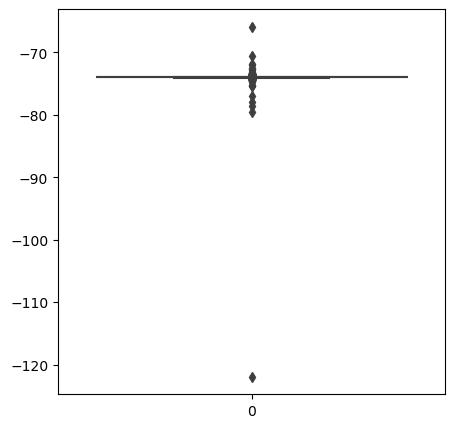

In [21]:
# Check outlier with boxplot

plt.figure(figsize=(5,5))
sns.boxplot(df.pickup_longitude)
plt.show()

## Observation

    1.We can see that here is one outlier present so we have to removeit
    2.One longitude is below -120 which is not good for our prdicttion

In [22]:
df[df.pickup_longitude<=-120]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_mean
421819,id2854272,2,2016-02-26 13:50:19,2016-02-26 13:58:38,2,-121.933342,37.389381,-121.933304,37.389511,N,499,952.229133


In [24]:
# check inedx of that outlier

print(np.where(df['pickup_longitude']<=-120))

# check all features of that index
df.iloc[421818]

(array([421818], dtype=int64),)


id                              id2854272
vendor_id                               2
pickup_datetime       2016-02-26 13:50:19
dropoff_datetime      2016-02-26 13:58:38
passenger_count                         2
pickup_longitude              -121.933342
pickup_latitude                 37.389381
dropoff_longitude             -121.933304
dropoff_latitude                37.389511
store_and_fwd_flag                      N
trip_duration                         499
trip_duration_mean             952.229133
Name: 421819, dtype: object

In [25]:
# Remove outliers

df.drop(df.index[421818],inplace=True)

In [39]:
# In relation with the mean pickup_longitude, trip duration mean

pickup_long = pd.pivot_table(train, values='trip_duration', index = ['pickup_longitude'], aggfunc=np.mean)
pickup_long

,trip_duration
pickup_longitude,
-79.569733,548.0
-75.354332,875.0
-74.726715,224.0
-74.612442,105.0
-74.584427,28.0
...,...
-73.092278,145.0
-72.809669,792.0
-72.591019,799.0


In [40]:
# Creating a new column and initializing it to 0

test['pickup_longitude_mean'] = 0

# For each unique pickup longitude entry

for i in train['pickup_longitude'].unique():
    
  # Assign the mean value corresponding to unique entry

  test['pickup_longitude_mean'][test['pickup_longitude'] == str(i)] = train['trip_duration'][train['pickup_longitude'] == str(i)].mean()

In [43]:
#calculating RMSE

pickup_long_error = sqrt(mse(test['trip_duration'] , test['pickup_longitude_mean'] ))
pickup_long_error

3303.2939212918554

Here we can observ that the RMSE of the trip duration mean with respect to the mean of pickup longitude is higher than the simple mean of the trip duration

In [44]:
# In relation with the mean pickup_latitude, trip duration mean

pickup_lat =pd.pivot_table(train, values='trip_duration', index = ['pickup_latitude'], aggfunc=np.mean)
pickup_lat

,trip_duration
pickup_latitude,
34.712234,875.0
40.099789,224.0
40.298828,240.0
40.355713,105.0
40.394730,28.0
...,...
41.319164,3190.0
41.586273,548.0
43.139652,799.0


In [46]:
# Creating a new column and initializing it to 0

test['pickup_lat_mean'] = 0

# For each unique pickup latitude entry

for i in train['pickup_latitude'].unique():
    
  # Assign the mean value corresponding to unique entry
  test['pickup_lat_mean'][test['pickup_latitude'] == str(i)] = train['trip_duration'][train['pickup_latitude'] == str(i)].mean()

In [47]:
#calculate RMSE
pickup_lat_error = sqrt(mse(test['trip_duration'] , test['pickup_lat_mean'] ))
pickup_lat_error

3303.2939212918554

Here we can observe that pick latitude error is same as pickup longitude error

In [48]:
# In relation with the mean dropoff_laatitude, trip duration mean

drop_off_lat = pd.pivot_table(train, values='trip_duration', index = ["dropoff_latitude"], aggfunc=np.mean)
drop_off_lat

,trip_duration
dropoff_latitude,
32.181141,875.0
38.478298,804.0
38.946033,282.0
40.153744,224.0
40.293289,4090.0
...,...
41.317879,21.0
42.090183,548.0
43.139652,799.0


In [49]:
# Creating a new column and initializing it to 0

test['drop_off_lat'] = 0

# For each unique dropoff latitude entry

for i in train['dropoff_latitude'].unique():
  # Assign the mean value corresponding to unique entry
  test['drop_off_lat'][test['dropoff_latitude'] == str(i)] = train['trip_duration'][train['dropoff_latitude'] == str(i)].mean()

In [50]:
drop_lat_error = sqrt(mse(test['drop_off_lat'] , test['trip_duration'] ))
drop_lat_error

3303.2939212918554

## Passenger_Count

<function matplotlib.pyplot.show(close=None, block=None)>

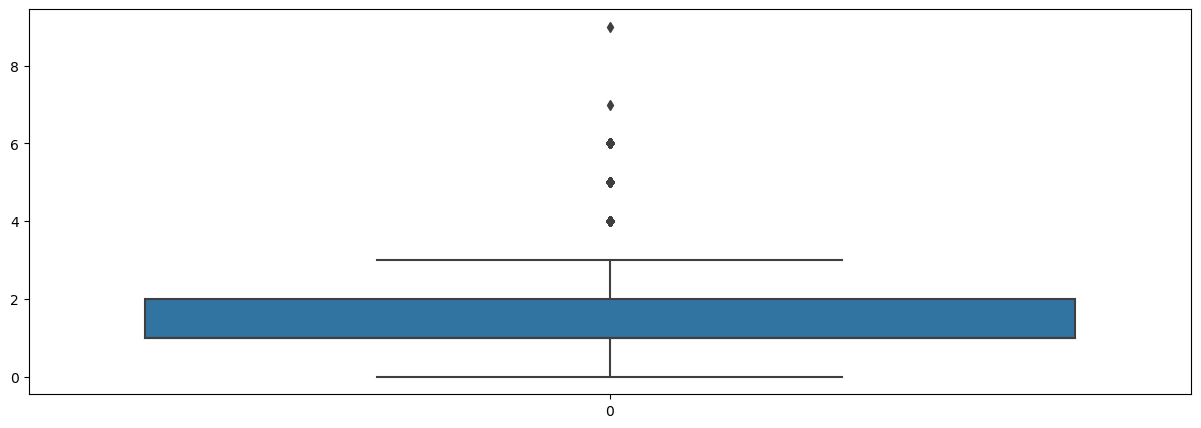

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(df.passenger_count)
plt.show

## Observations:
    1.There are some trips with 0 passenger count.
    2.Few trips consisted of even 7,9 passengers. Clear outliers and pointers to data inconsistency
    3.Most of trip consist of passenger either 1 or 2.

## Fact
        Passenger count is a driver entered value. Since the trip is not possible without passengers. It is evident that the driver forgot to enter the value for the trips with 0 passenger count. Lets analyze the passenger count distribution further to make it consistent for further analysis

In [30]:
df['passenger_count'].describe()

count    729320.000000
mean          1.662055
std           1.312447
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

As per above details. Mean median and mode are all approx equal to 1. So we would replace the 0 passenger count with 1.

In [31]:
df['passenger_count']=df.passenger_count.map(lambda x:1 if x==0 else x)

Also, we will remove the records with passenger count > 7, 8 or 9 as they are extreme values and looks very odd to be ocupied in a taxi.

In [32]:
df=df[df.passenger_count<=6]

In [33]:
df['passenger_count'].value_counts()

1    517447
2    105096
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

Now the data is consistent with respect to the passenger count. Let's take a look at the ditribution with a graph below

In [51]:
# In relation with the mean passenger count, trip duration mean

pass_count = pd.pivot_table(train, values='trip_duration', index = ["passenger_count"], aggfunc=np.mean)
pass_count

,trip_duration
passenger_count,
1,917.538900
2,986.385810
3,1010.533202
4,999.464860
5,1081.423008
6,1079.423048


In [52]:
# Creating a new column and initializing it to 0

test['pass_count_mean'] = 0

# For each unique passenger count entry

for i in train['passenger_count'].unique():
    
  # Assign the mean value corresponding to unique entry
  test['pass_count_mean'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

In [53]:
pass_count_error = sqrt(mse(test['trip_duration'] , test['pass_count_mean'] ))
pass_count_error

3303.2939212918554

## store_and_fwd_flag

In [54]:
# In relation with the mean store_and_fwd_flag, trip duration mean

store_and_fwd = pd.pivot_table(train, values='trip_duration', index = ["store_and_fwd_flag"], aggfunc=np.mean)
store_and_fwd 

,trip_duration
store_and_fwd_flag,
N,946.260915
Y,1086.768763


In [55]:
# Creating a new column and initializing it to 0

test['store_and_fwd'] = 0

# For each unique passenger count entry

for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd'][test['store_and_fwd_flag'] == str(i)] = train['trip_duration'][train['store_and_fwd_flag'] == str(i)].mean()

In [56]:
str_and_fwd_error = sqrt(mse(test['store_and_fwd'] , test['trip_duration'] ))
str_and_fwd_error

3163.095613052802

## conclusions
    1.The error of simple mean of trip duration is 3163.1118004692 where as the store_and_fwd_flag is 3163.095613052802 there's only slight difference in the errors between the two.
    2.The pickup longitude error , pickup latitude error and passenger count error is 3303.2939212918554